In [18]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_merge_df = pd.merge(ride_df, city_df, on="city")

# Display the data table for preview
city_ride_merge_df.head()
#city_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
city_groups = city_ride_merge_df.groupby(["type", "city"])
city_drivers = city_groups.sum()
city_drivers["rides"] = city_groups["ride_id"].count()
city_drivers.head()
#city_drivers.columns

fare         ride_id  driver_count  rides
type  city                                                       
Rural Bradshawfurt    400.64  37352940220451            70     10
      Garzaport        72.37  17847448587502            21      3
      Harringtonfort  200.82  34358434657936            24      6
      Jessicaport     216.08  21736803740352             6      6
      Lake Jamie      206.15  21353310731781            24      6

In [3]:
city_drivers["average_fare"] = city_drivers['fare'] / city_drivers['rides']
city_drivers.head()

fare         ride_id  driver_count  rides  \
type  city                                                          
Rural Bradshawfurt    400.64  37352940220451            70     10   
      Garzaport        72.37  17847448587502            21      3   
      Harringtonfort  200.82  34358434657936            24      6   
      Jessicaport     216.08  21736803740352             6      6   
      Lake Jamie      206.15  21353310731781            24      6   

                      average_fare  
type  city                          
Rural Bradshawfurt       40.064000  
      Garzaport          24.123333  
      Harringtonfort     33.470000  
      Jessicaport        36.013333  
      Lake Jamie         34.358333

In [4]:
city_rural = "Rural"
rural_one_type = city_drivers.loc[city_rural]
# Place the city keys for that single city type into a list
rural_city_list = rural_one_type.keys()
# Rural counts
#rural_city_rides = rural_one_type["ride_id"].count()
rural_one_type.head()
#bike_pie = just_one_type.plot(kind="bar", y=city_list, title=("Trips of " + city_type))
#bike_pie.set_ylabel("Trip Duration")
#plt.show()
#plt.tight_layout()
#plt.axis("equal")

,fare,ride_id,driver_count,rides,average_fare
city,,,,,
Bradshawfurt,400.64,37352940220451,70,10,40.064000
Garzaport,72.37,17847448587502,21,3,24.123333
Harringtonfort,200.82,34358434657936,24,6,33.470000
Jessicaport,216.08,21736803740352,6,6,36.013333
Lake Jamie,206.15,21353310731781,24,6,34.358333


In [5]:
city_urban = "Urban"
urban_one_type = city_drivers.loc[city_urban]
# Place the city keys for that single city type into a list
urban_city_list = urban_one_type.keys()
# Rural counts
#rural_city_rides = rural_one_type["ride_id"].count()
urban_one_type.head()

,fare,ride_id,driver_count,rides,average_fare
city,,,,,
Amandaburgh,443.55,96468054851003,216,18,24.641667
Barajasview,557.31,102893297406279,572,22,25.332273
Carriemouth,764.49,139991078502567,1404,27,28.314444
Christopherfurt,661.55,123722295302015,1107,27,24.501852
Deanville,491.01,93128654434912,931,19,25.842632


In [6]:
city_sub = "Suburban"
sub_one_type = city_drivers.loc[city_sub]
# Place the city keys for that single city type into a list
sub_city_list = sub_one_type.keys()
# Rural counts
#rural_city_rides = rural_one_type["ride_id"].count()
sub_one_type.head()

,fare,ride_id,driver_count,rides,average_fare
city,,,,,
Barronchester,582.76,71372735666520,176,16,36.422500
Bethanyland,593.21,105165903035418,396,18,32.956111
Brandonfort,673.31,103161250476129,190,19,35.437368
Colemanland,679.68,113425702090831,506,22,30.894545
Davidfurt,543.93,77775872278918,391,17,31.995882


## Bubble Plot of Ride Sharing Data

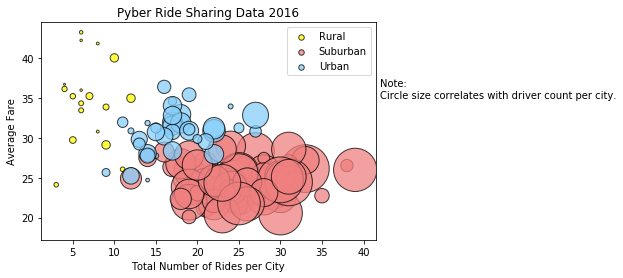

In [11]:
# Obtain the x and y coordinates for each of the three city types

# Build a scatter plot which compares Rides per city to Average Fare ($) per city
rural_plot = plt.scatter(rural_one_type["rides"], rural_one_type["average_fare"], marker="o", facecolors="yellow", edgecolors="black",
            s=rural_one_type["driver_count"], alpha=.75)
urban_plot = plt.scatter(urban_one_type["rides"], urban_one_type["average_fare"], marker="o", facecolors="lightcoral", edgecolors="black",
            s=urban_one_type["driver_count"], alpha=.75)
suburban_plot = plt.scatter(sub_one_type["rides"], sub_one_type["average_fare"], marker="o", facecolors="lightskyblue", edgecolors="black",
            s=sub_one_type["driver_count"], alpha=.75)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare")

# Create a legend
c_types = ["Rural", "Suburban", "Urban"]
#plt.legend(prop={'size': 6})
#plt.legend(c_types, loc="best", markerscale = .3, scatterpoints=1)
legend = plt.legend(c_types, loc="best", markerscale = .3, scatterpoints=1)
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)
#plt.legend((rural_plot, urban_plot, suburban_plot),
#           (c_types), scatterpoints=1, loc='best', ncol=3, fontsize=8)
#plt.legend(rural_plot, markersize = 15, urban_plot, suburban_plot], c_types, loc="best")
#lgnd = plt.legend(c_types, loc="best", numpoints=1, fontsize=10)
#plt.grid()

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("pyber_scatter1.png")
plt.show()

## Total Fares by City Type

In [12]:
# Calculate Type Percents - Total Fares by City Type

type_groups = city_ride_merge_df.groupby("type")
type_groups_sum = type_groups.sum()
type_groups_sum.head()

faresum = type_groups_sum["fare"].sum()
faresum
type_groups_sum["Percentage Total Fare"] = ((type_groups_sum["fare"]) / faresum) *100
#type_groups_sum["Percentage Total Fare"] = type_groups_sum["Percentage Total Fare"].map("{:,.1f}%".format)
type_groups_sum.head()


,fare,ride_id,driver_count,Percentage Total Fare
type,,,,
Rural,4327.93,580968240341287,537,6.811493
Suburban,19356.33,3106884522576766,8570,30.463872
Urban,39854.38,7919412664056093,59602,62.724635


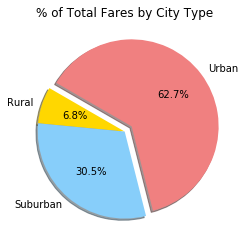

In [13]:
# Build Pie Chart
name = ["Rural", "Suburban", "Urban"]
fare = type_groups_sum["Percentage Total Fare"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.00, 0.00, 0.10)

#plt.title("Percent of Total Fares by City Type")
plt.pie(fare, explode=explode, labels=name, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
#plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("pyber_total_fare_by_city_type1.png")
plt.show()


## Total Rides by City Type

In [14]:
# Calculate Ride Percents - Total Rides by City Type

type_groups = city_ride_merge_df.groupby("type")
#type_groups["rides_count"] = type_groups["ride_id"].count()
#ride_counts = type_groups["ride_id"].count()
type_groups_cnt = type_groups.count()
#type_groups_sum = type_groups.sum()
#ride_counts
type_groups_cnt.head()

ride_cnt_sum = type_groups_cnt["ride_id"].sum()
#ride_cnt_sum
type_groups_cnt["Percentage Total Rides"] = ((type_groups_cnt["ride_id"]) / ride_cnt_sum) *100
#type_groups_cnt["Percentage Total Rides"] = type_groups_cnt["Percentage Total Rides"].map("{:,.1f}%".format)
type_groups_cnt.head()

# Build Pie Chart

# Save Figure
#plt.savefig("pyber_total_rides_by_city_type1.png")
#plt.show()

,city,date,fare,ride_id,driver_count,Percentage Total Rides
type,,,,,,
Rural,125,125,125,125,125,5.263158
Suburban,625,625,625,625,625,26.315789
Urban,1625,1625,1625,1625,1625,68.421053


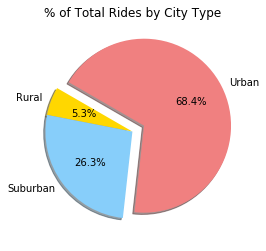

In [15]:
name = ["Rural", "Suburban", "Urban"]
drivers = type_groups_cnt["Percentage Total Rides"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.00, 0.00, 0.15)

#plt.title("Percent of Total Fares by City Type")
plt.pie(drivers, explode=explode, labels=name, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
#plt.axis("equal")
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("pyber_total_rides_by_city_type1.png")
plt.show()

## Total Drivers by City Type

In [16]:
# Calculate Driver Percents
#city_drivers.head()
#driver_groups = city_ride_merge_df.groupby("type")
driver_groups = city_df.groupby("type")
#driver_drivers = driver_groups.sum()
#driver_drivers = driver_groups["driver_count"].sum()
#driver_drivers
#drivers_drivers.head()
#driver_groups = city_drivers.groupby("type")
driver_groups = driver_groups.sum()
driver_groups.head()

driversum = driver_groups["driver_count"].sum()

#driversum = city_drivers["driver_count"].sum()
#driversum
#driversum = type_groups_sum["rides"].sum()
#faresum
driver_groups["Percentage Total Drivers"] = ((driver_groups["driver_count"]) / driversum) *100
#driver_groups["Percentage Total Drivers"] = driver_groups["Percentage Total Drivers"].map("{:,.1f}%".format)
driver_groups.head()

,driver_count,Percentage Total Drivers
type,,
Rural,78,2.623613
Suburban,490,16.481668
Urban,2405,80.894719


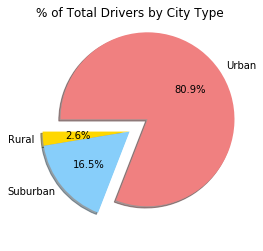

In [17]:
# Calculate Driver Percents
#type_groups = city_ride_merge_df.groupby("type")
#driver_groups_sum = type_groups.sum()

# Build Pie Charts
# Build Pie Chart
name = ["Rural", "Suburban", "Urban"]
drivers = driver_groups["Percentage Total Drivers"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.00, 0.00, 0.25)

#plt.title("Percent of Total Fares by City Type")
plt.pie(drivers, explode=explode, labels=name, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
#plt.axis("equal")
plt.title("% of Total Drivers by City Type")


# Save Figure
plt.savefig("pyber_drivers_by_city_type1.png")
plt.show()

## Conclusions

In evaluating the various analysis on the Pyber data, noted the following 3 items:
* When comparing the Number of Rides to the Average Fare per city, the rural areas appeared to have the lowest number of drivers, with the highest revenue average per city; whereas, the suburban areas had the highest number of drivers, but a low average revenue per city. 
    * Rural cities had 0 to 10 rides with an average fare around 35 dollars
    * Suburban cities had 20 to 40 rides with an average fare 20-30 dollars
    * Urban cities had 10 to 20 rides and averaged a fare of 30-35 dollars
* Urban areas make up the highest percentage of fares with 80% or more while also having the highest average of drivers and rides.  There may be some issues with equivalency that may have to be evaluated more to understand the true comparisons between the markets.
* The suburban areas seem to have the lowest percentage of drivers to overall fare and ride count and may have a higher overall margin that the other markets. More differentiation is likely needed to stand out or provide unique services to increase the margin within the suburban markets.